# How to Train YOLOv9 on a Custom Dataset
---

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/WongKinYiu/yolov9)
[![arXiv](https://img.shields.io/badge/arXiv-2402.13616-b31b1b.svg)](https://arxiv.org/pdf/2402.13616.pdf)

<br>

![YOLOv9 Benchmark](https://storage.googleapis.com/com-roboflow-marketing/notebooks/examples/yolov9-benchmark.jpeg)

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Mon Jun 24 05:34:08 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Clone and Install

**NOTE:** YOLOv9 is very new. At the moment, we recommend using a fork of the main repository. The `detect.py` script contains a bug that prevents inference. This bug is patched in the fork.

In [ ]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt -q

Cloning into 'yolov5'...
remote: Enumerating objects: 16680, done.
remote: Counting objects: 100% (221/221), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 16680 (delta 102), reused 131 (delta 61), pack-reused 16459
Receiving objects: 100% (16680/16680), 15.37 MiB | 16.08 MiB/s, done.
Resolving deltas: 100% (11401/11401), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.0/793.0 kB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 69.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the fo

**NOTE:** Let's install additional packages that will be useful later on.

In [ ]:
!pip install -q roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.9 MB/s eta 0:00:00


## Imports

In [ ]:
import roboflow

from IPython.display import Image

## Download model weights

**NOTE:** In the YOLOv9 paper, versions yolov9-s and yolov9-m are also mentioned, but the weights for these models are not yet available in the YOLOv9 repository.

In [ ]:
!mkdir -p {HOME}/weights

In [ ]:
!wget -P {HOME}/weights -q https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5x.pt
!wget -P {HOME}/weights -q https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5l.pt

In [ ]:
!ls -la {HOME}/weights

total 261484
drwxr-xr-x 2 root root      4096 Jun 24 05:36 .
drwxr-xr-x 1 root root      4096 Jun 24 05:36 ..
-rw-r--r-- 1 root root  93622629 Nov 22  2022 yolov5l.pt
-rw-r--r-- 1 root root 174114333 Nov 22  2022 yolov5x.pt


## Download example data

In [ ]:
!mkdir -p {HOME}/data

In [ ]:
SOURCE_IMAGE_PATH = "/content/01.jpg"

## Detection with pre-trained COCO model

### gelan-c

In [ ]:
!python detect.py --weights /content/weights/yolov5x.pt --conf 0.1 --source /content/01.jpg --device 0

detect: weights=['/content/weights/yolov5x.pt'], source=/content/01.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-331-gab364c98 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5x summary: 444 layers, 86705005 parameters, 0 gradients, 205.5 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/01.jpg: 384x640 3 persons, 8 cars, 1 motorcycle, 4 trucks, 2 benchs, 2 chairs, 57.3ms
Speed: 0.6ms pre-process, 57.3ms inference, 721.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


**NOTE:** By default, the results of each subsequent inference sessions are saved in `{HOME}/yolov9/runs/detect/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

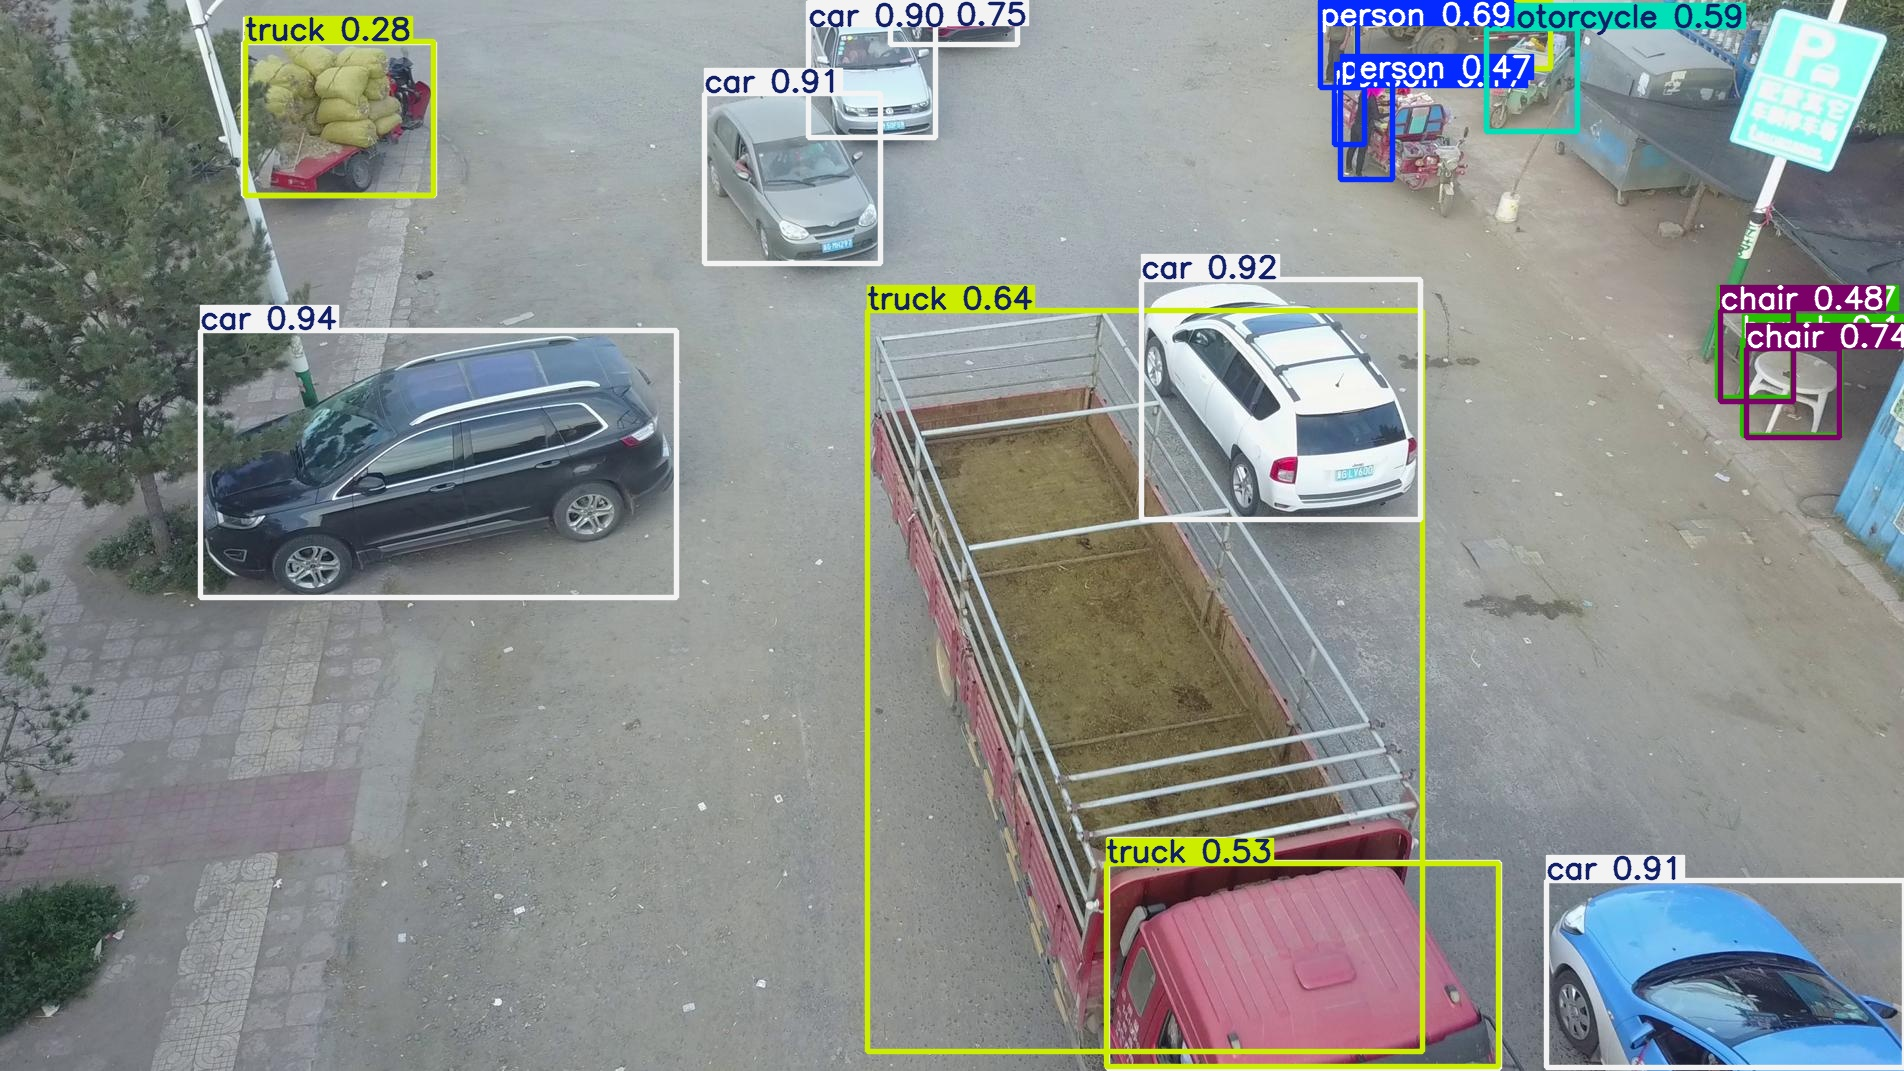

In [ ]:
Image(filename=f"/content/yolov5/runs/detect/exp/01.jpg", width=600)

## yolov9-e

In [ ]:
!python detect.py --weights /content/weights/yolov5l.pt --conf 0.1 --source /content/401.jpg --device 0

detect: weights=['/content/weights/yolov5l.pt'], source=/content/401.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-331-gab364c98 Python-3.10.12 torch-2.3.0+cu121 CPU

Fusing layers... 
YOLOv5l summary: 367 layers, 46533693 parameters, 0 gradients, 109.0 GFLOPs
image 1/1 /content/401.jpg: 512x640 2 cars, 1 truck, 1 tv, 1549.9ms
Speed: 2.5ms pre-process, 1549.9ms inference, 27.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


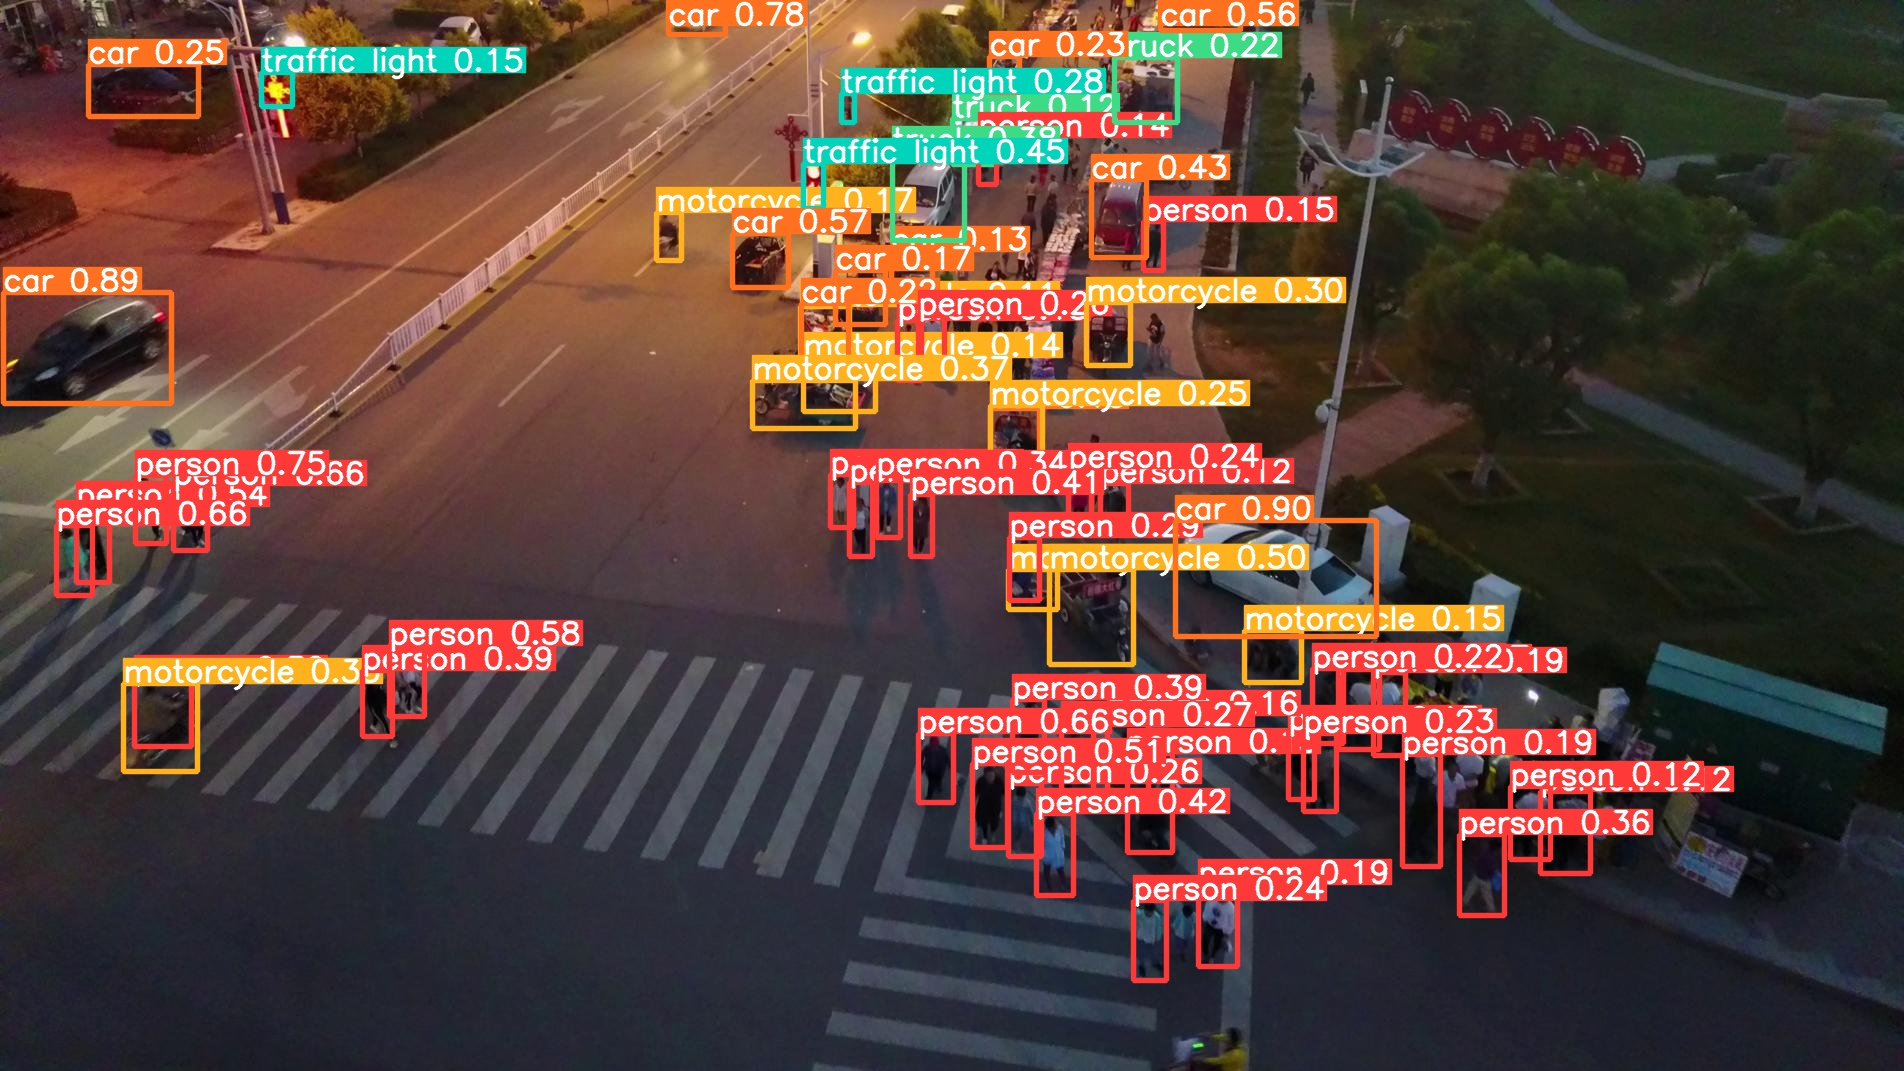

In [ ]:
Image(filename=f"/content/yolov5/runs/detect/exp3/401.jpg", width=600)

## Authenticate and Download the Dataset

**NOTE:** The dataset must be saved inside the `{HOME}/yolov9` directory, otherwise, the training will not succeed.

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="wAJf35FEugyua2Fv6KQv")
project = rf.workspace("gemastikfix").project("imagerydetection-test")
version = project.version(2)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to imageryDetection-Test-2 in yolov5pytorch:: 100%|██████████| 3080/3080 [00:00<00:00, 4602.86it/s]


## Train Custom Model

In [ ]:
%cd {HOME}/yolov5

!python train.py \
--batch 8 --epochs 15 --img 640 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/yolov5x.pt \
--cfg models/yolov5x.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov5
2024-06-24 05:37:52.542666: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-24 05:37:52.542722: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-24 05:37:52.665845: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=/content/weights/yolov5x.pt, cfg=models/yolov5x.yaml, data=/content/yolov5/imageryDetection-Test-2/data.yaml, hyp=hyp.scratch-high.yaml, epochs=15, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, ca

## Examine Training Results

**NOTE:** By default, the results of each subsequent training sessions are saved in `{HOME}/yolov9/runs/train/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

In [ ]:
!ls {HOME}/yolov5/runs/train/exp/

confusion_matrix.png				    PR_curve.png	   val_batch0_pred.jpg
events.out.tfevents.1719207475.070224c811e2.1565.0  R_curve.png		   val_batch1_labels.jpg
F1_curve.png					    results.csv		   val_batch1_pred.jpg
hyp.yaml					    results.png		   val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	   val_batch2_pred.jpg
labels.jpg					    train_batch1.jpg	   weights
opt.yaml					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


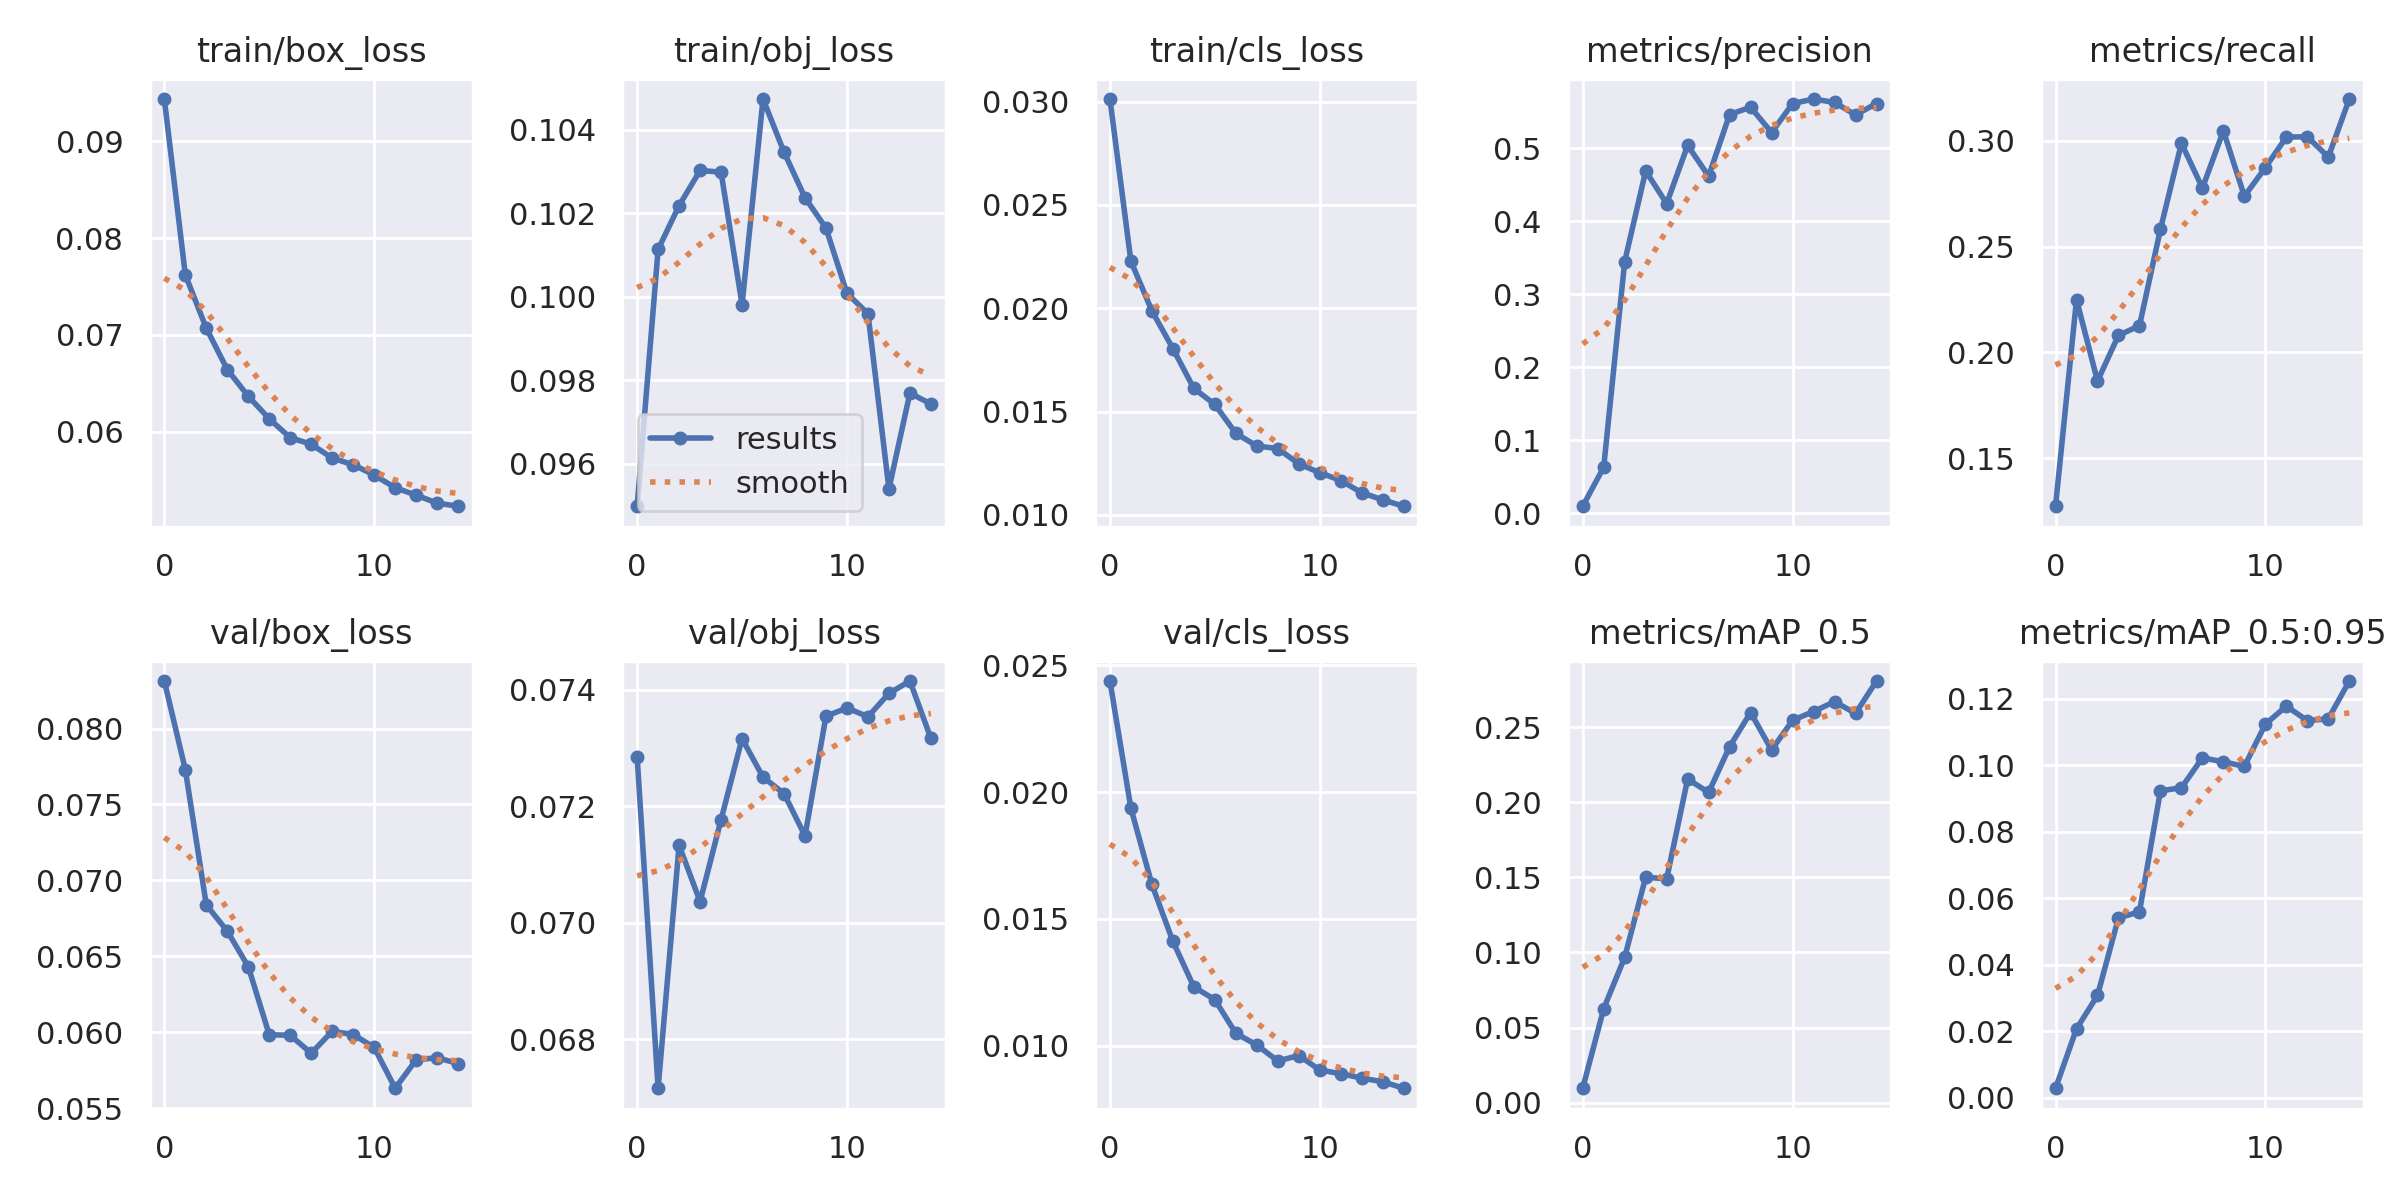

In [ ]:
Image(filename=f"{HOME}/yolov5/runs/train/exp/results.png", width=1000)

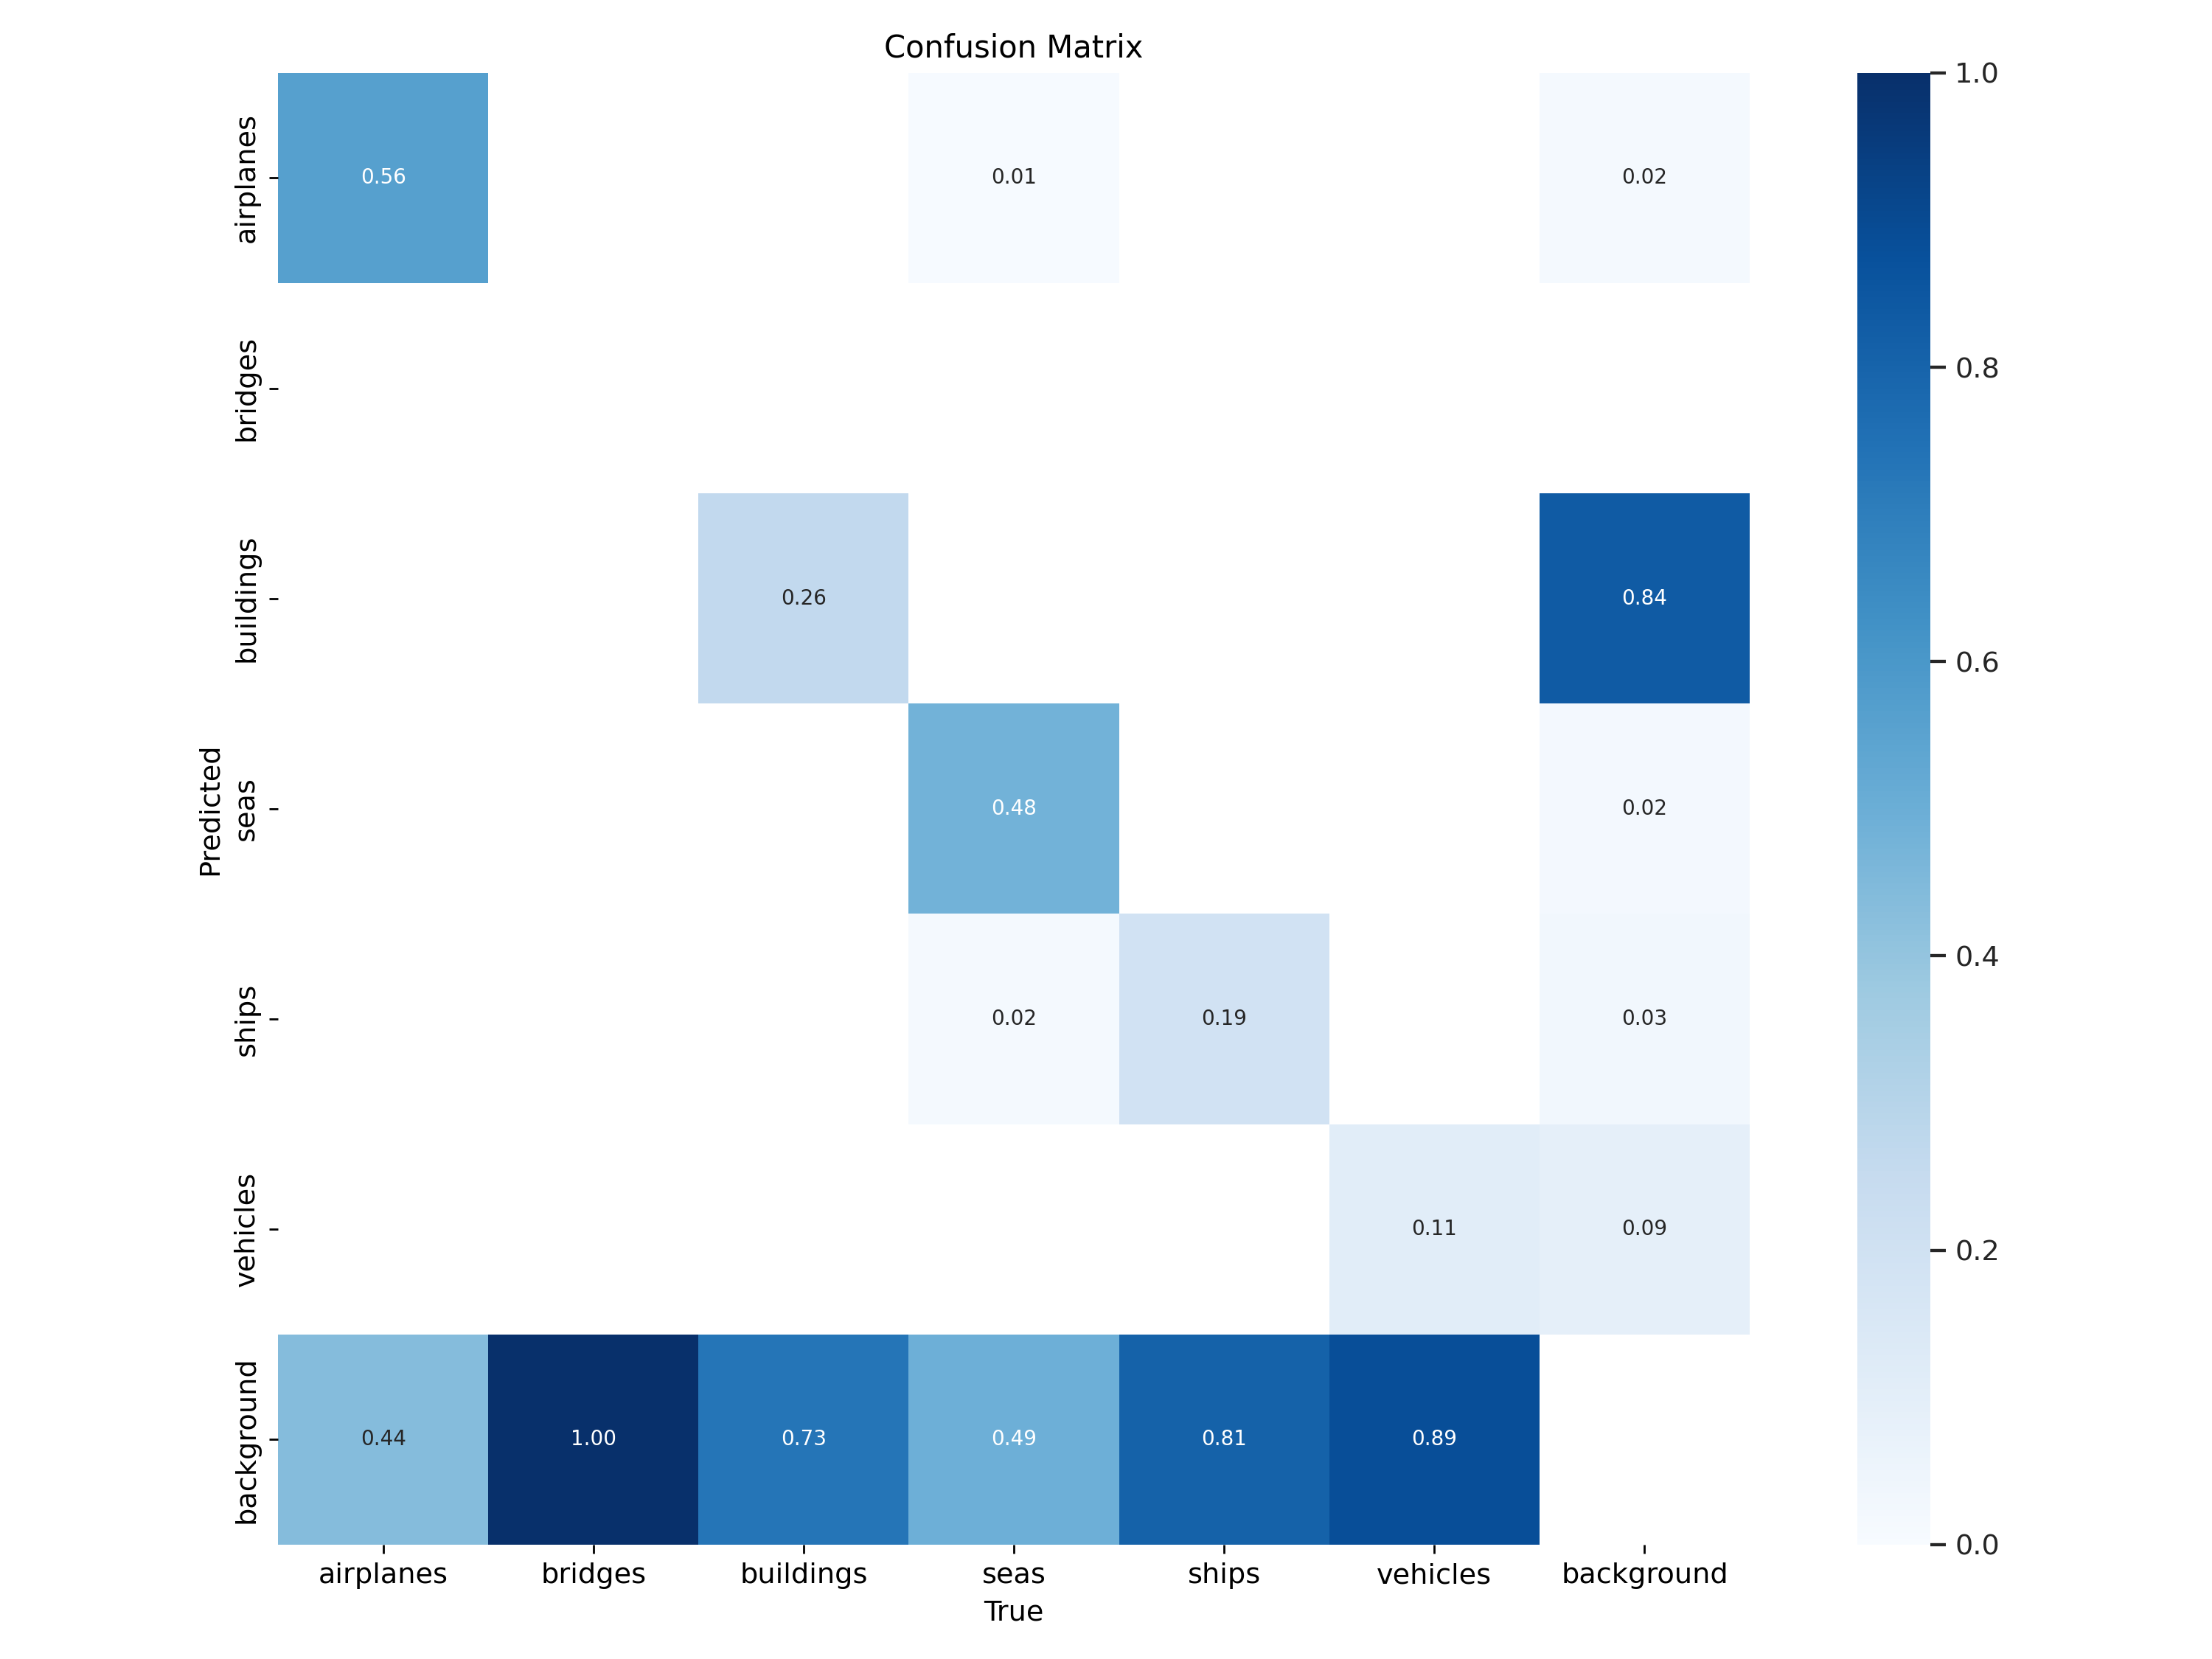

In [ ]:
Image(filename=f"{HOME}/yolov5/runs/train/exp/confusion_matrix.png", width=1000)

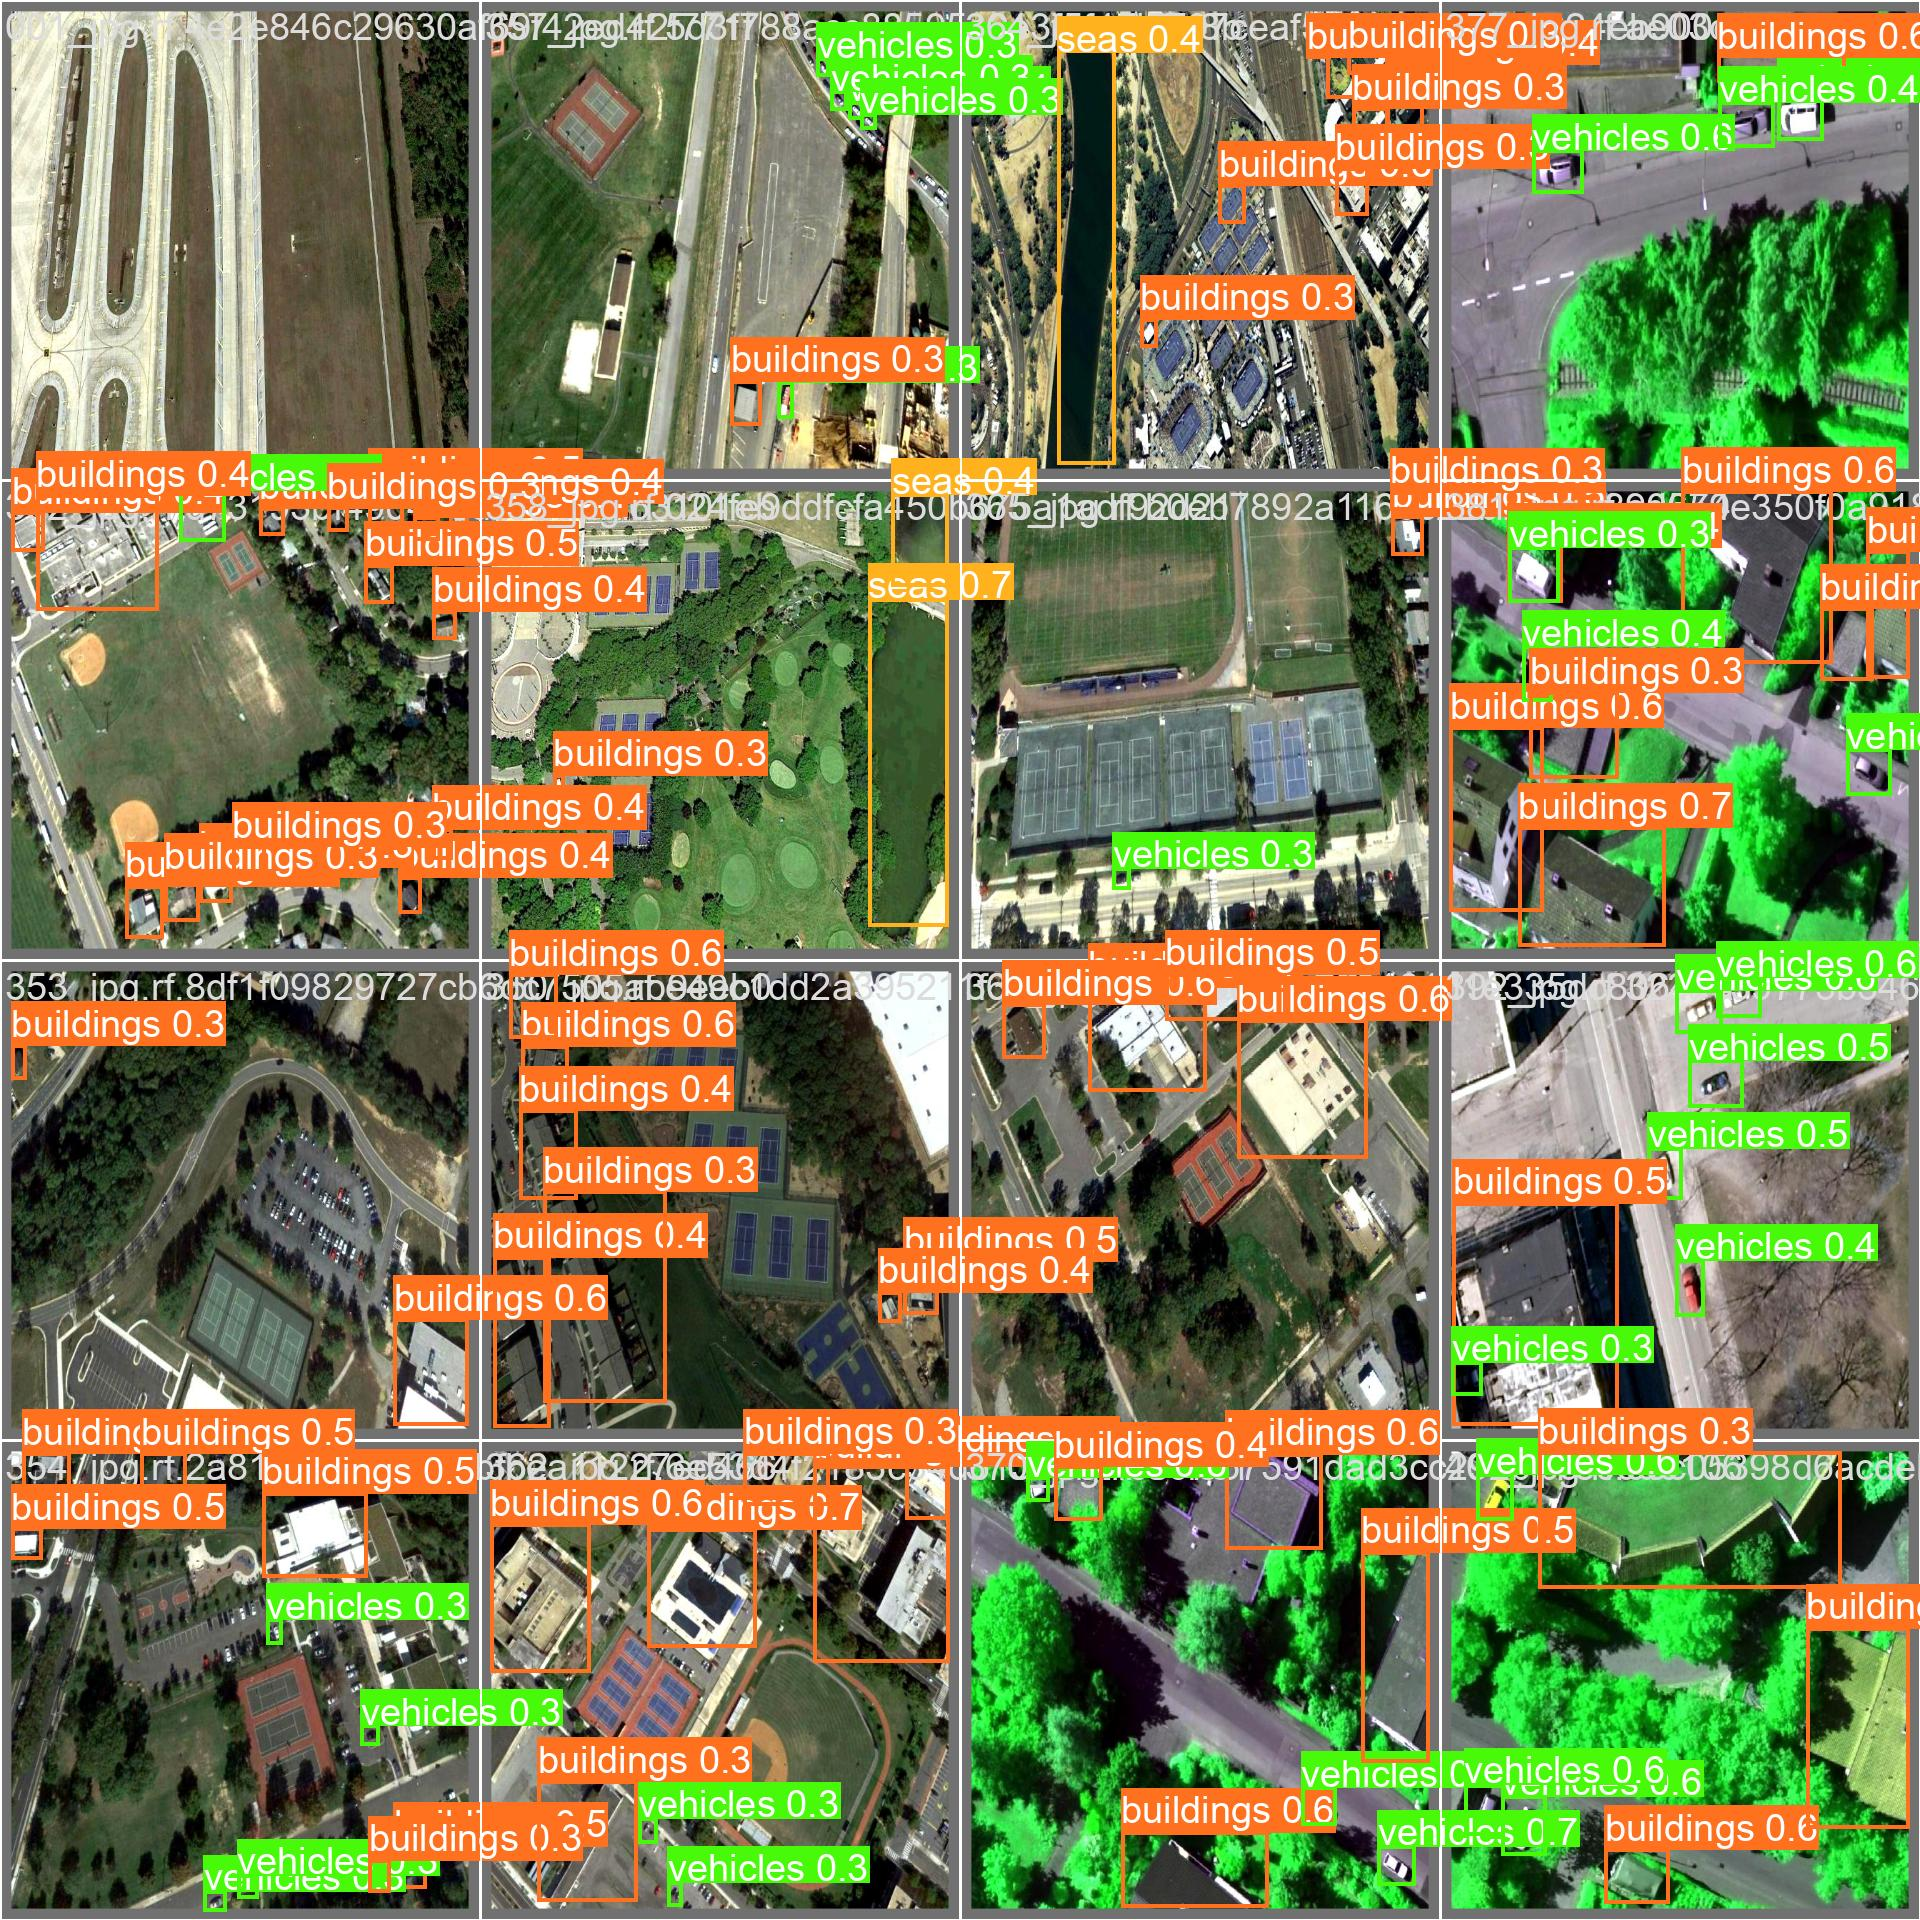

In [ ]:
Image(filename=f"{HOME}/yolov5/runs/train/exp/val_batch0_pred.jpg", width=1000)

## Validate Custom Model

In [ ]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 8 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov5/runs/train/exp/weights/best.pt

[Errno 2] No such file or directory: '/content/yolov9'
/content/yolov5
val: data=/content/yolov5/imageryDetection-Test-2/data.yaml, weights=['/content/yolov5/runs/train/exp/weights/best.pt'], batch_size=8, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-331-gab364c98 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5x summary: 322 layers, 86207059 parameters, 0 gradients, 203.9 GFLOPs
val: Scanning /content/yolov5/imageryDetection-Test-2/valid/labels.cache... 285 images, 12 backgrounds, 0 corrupt: 100% 285/285 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0% 0/36 [00:00<?, ?it/s]WARNING ⚠️ NMS time limit 0.900s exceeded
                 Class     Images  I

## Inference with Custom Model

In [ ]:
!python detect.py \
--img 640 --conf 0.1 --device 0 \
--weights {HOME}/yolov5/runs/train/exp/weights/best.pt \
--source {dataset.location}/valid/images

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/yolov5/imageryDetection-Test-2/valid/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-331-gab364c98 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5x summary: 322 layers, 86207059 parameters, 0 gradients, 203.9 GFLOPs
image 1/285 /content/yolov5/imageryDetection-Test-2/valid/images/001_jpg.rf.4e2e846c29630af69f42ed42f771fbf7.jpg: 640x640 (no detections), 86.3ms
image 2/285 /content/yolov5/imageryDetection-Test-2/valid/images/001_jpg.rf.769d12307438e1170381e3390ae101e9.jpg: 640x640 1 airpla

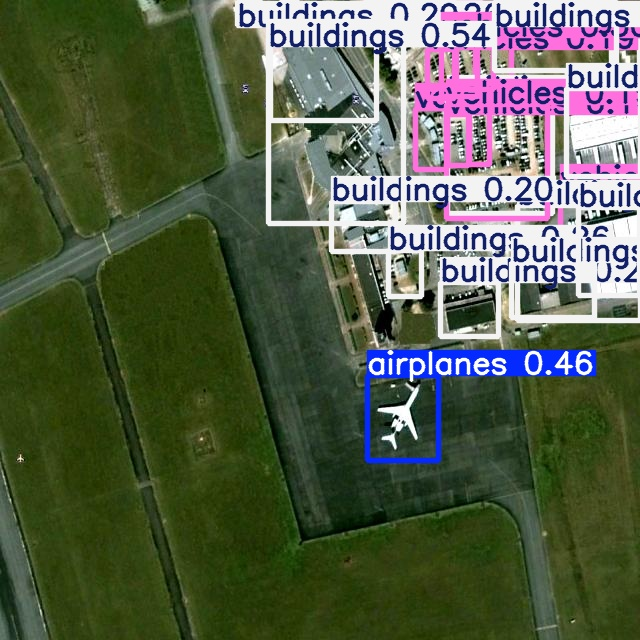

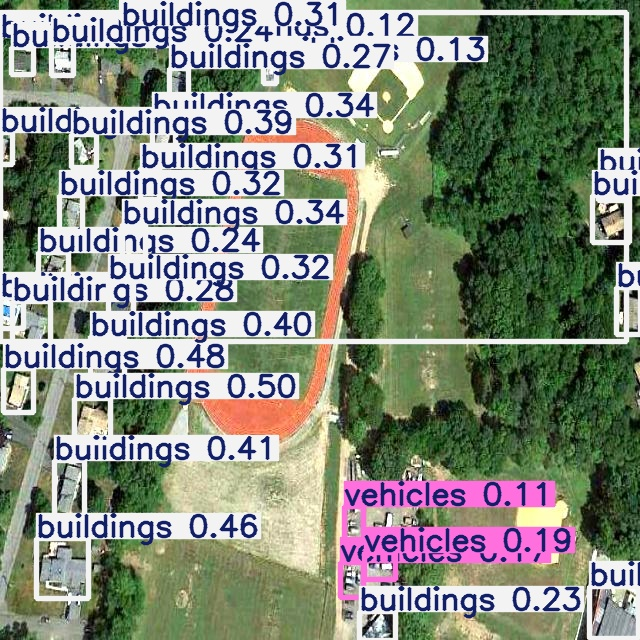

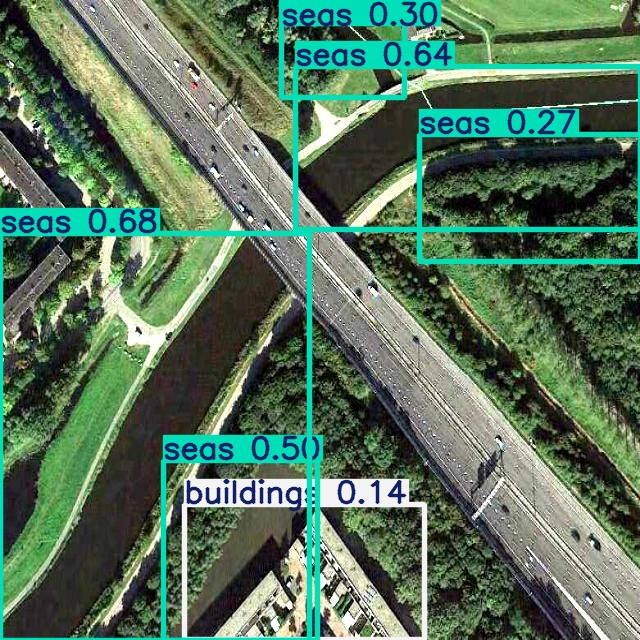

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov5/runs/detect/exp2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")